<a href="https://colab.research.google.com/github/Regina00at/2020-01-20191068-JinaKim-Machine-Learning-Programming/blob/master/lesson7_resnet_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST CNN

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
#fastai.vision의 모든 함수들을 import한다.

### Data

In [3]:
path = untar_data(URLs.MNIST)
#path => URls.MNIST(지정된 경로)
#untar_data : download url to fname.

In [5]:
path.ls()
#path 안에 뭐가 있는지 listup한다.
#path는 어떤 경로를 의미하는 문자열이다.
#두 문자열은 mnist_png폴더 안에 testing폴더와 training폴더가 있음을 보여준다.

[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/training')]

In [ ]:
il = ImageList.from_folder(path, convert_mode='L')
#il = Get the list of files in path. 

In [7]:
il.items[0]
#il의 item 중 가장 첫 번째 아이템을 출력한다.

PosixPath('/root/.fastai/data/mnist_png/testing/9/4363.png')

In [8]:
il
#il 이 무엇인지 출력한다.
#il은 이미지리스트이다. 총 7만장의 사진데이터가 있다.
#경로는 다음과 같다 : /root/.fastai/data/mnist_png

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png

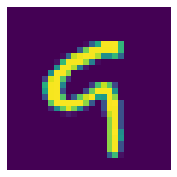

In [9]:
il[0].show()
#il의 첫번째 이미지를 시각화한다.

In [ ]:
sd = il.split_by_folder(train='training', valid='testing')
#sd를 train data는 training folder에, valid data는 testing folder에 분류해서 나눈다.

In [11]:
sd
#sd가 무엇인지 출력한다.
#쉽게 생각하면 il을 train folder와 validation folder에 나누어 넣은것이다.
#train image list에는 6만장이, valid image list에는 1만장의 사진데이터가 있다.
#두 데이터 모두 /root/.fastai/data/mnist_png 에 들어있다.(경로) 원래 il의 경로이다.
#이미지는 1, 28, 28의 사이즈를 가지고있다.

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Test: None

In [12]:
(path/'training').ls()
#training폴더에 뭐가 있는지 리스트업한다. 0부터 9까지의 숫자 폴더가 있는 것으로 보인다.

[PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/7'),
 PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/0'),
 PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/3'),
 PosixPath('/root/.fastai/data/mnist_png/training/8'),
 PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/4')]

In [ ]:
ll = sd.label_from_folder()

In [14]:
ll
#ll을 보여준다.

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Test: None

In [ ]:
x,y = ll.train[0]
#x,y는 첫번째 요소

9 torch.Size([1, 28, 28])


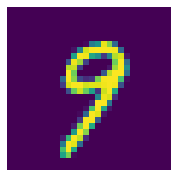

In [16]:
x.show()
print(y,x.shape)
#직접 보여준다.

In [ ]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])
#transform 형태를 직접 잡아준다.

In [ ]:
ll = ll.transform(tfms)
#ll을 지정된 형태로 바꿔준다.

In [ ]:
bs = 128
#batch size는 128.

In [ ]:
# not using imagenet_stats because not using pretrained model
data = ll.databunch(bs=bs).normalize()


In [ ]:
x,y = data.train_ds[0]

9


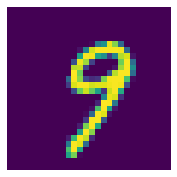

In [22]:
x.show()
print(y)

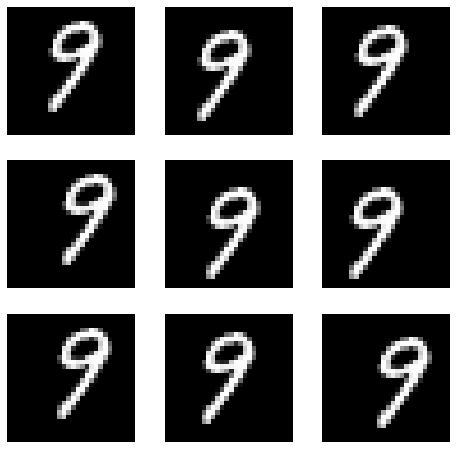

In [23]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [24]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

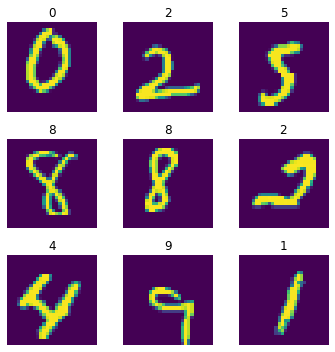

In [25]:
data.show_batch(rows=3, figsize=(5,5))

### Basic CNN with batchnorm

In [ ]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [ ]:
model = nn.Sequential(
    conv(1, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [29]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [ ]:
xb = xb.cuda()

In [31]:
model(xb).shape

torch.Size([128, 10])

In [32]:
learn.lr_find(end_lr=100)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


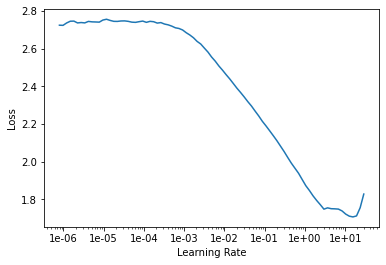

In [33]:
learn.recorder.plot()
#위의 learner find에서 보여주는 결과를 시각화한다.

In [34]:
learn.fit_one_cycle(3, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.217014,0.271022,0.912100,00:37
1,0.126429,0.081967,0.973900,00:37
2,0.073568,0.040438,0.987100,00:37


### Refactor

In [ ]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [ ]:
model = nn.Sequential(
    conv2(1, 8),   # 14
    conv2(8, 16),  # 7
    conv2(16, 32), # 4
    conv2(32, 16), # 2
    conv2(16, 10), # 1
    Flatten()      # remove (1,1) grid
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [38]:
learn.fit_one_cycle(3, max_lr=0.1)
#10번 train한다.

epoch,train_loss,valid_loss,accuracy,time
0,0.246145,0.382397,0.878100,00:36
1,0.139649,0.095684,0.970400,00:36
2,0.076493,0.043963,0.986900,00:36


### Resnet-ish

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [40]:
help(res_block)

Help on function res_block in module fastai.layers:

res_block(nf, dense:bool=False, norm_type:Union[fastai.layers.NormType, NoneType]=<NormType.Batch: 1>, bottle:bool=False, **conv_kwargs)
    Resnet block of `nf` features. `conv_kwargs` are passed to `conv_layer`.



In [ ]:
model = nn.Sequential(
    conv2(1, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 10),
    Flatten()
)

In [ ]:
def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [ ]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


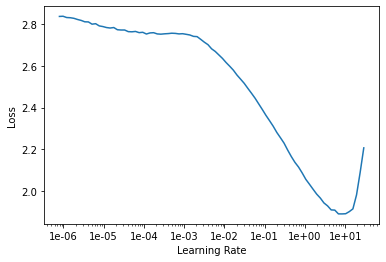

In [45]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(3, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.162512,0.276742,0.911100,00:42
1,0.079491,0.073096,0.978100,00:42
2,0.040904,0.026173,0.991300,00:42


In [47]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          72         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
___________________________________________________

## fin

*Model에 대한 설명 더 필요한데요. output shape 왜 [8, 14, 14] --> [10]로 되어 있을까요 ?*

*다음 과제도 부족한데요*